In [1]:
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

class Crawlling():
    # 크롤링을 하고 싶은 웹의 정보를 저장
    # 이름 : {url : 웹주소, search : 검색창 ID}
    def __init__(self):
        self.web_list = {}

    # 웹 정보를 추가하는 함수
    # _name은 웹 정보의 key
    # _url은 웹의 주소
    # _id는 웹의 검색어창 ID
    def add_list(self, _name, _url, _id):
        if _name not in self.web_list:
            self.web_list[_name] = {
                'url' : _url, 
                'search' : _id
            }
            return "웹 정보가 정상적으로 저장되었습니다."
        else:
            return "해당하는 웹 정보가 존재합니다."
    
    # 웹을 선택하여 검색하는 함수
    # _name은 웹 정보 중 리스트의 key
    # _search는 검색어
    def web_search(self, _name ,_search):
        self.path = "../webdriver/chromedriver"
        self.driver = webdriver.Chrome(self.path)
        # print(self.url)
        self.driver.get(self.web_list[_name]['url'])
        # 1초 딜레이 생성
        time.sleep(1)
        self.element = self.driver.find_element(By.ID, self.web_list[_name]['search'])
        self.element.send_keys(_search)
        self.element.send_keys(Keys.ENTER)
        time.sleep(1)
        self.result = bs(self.driver.page_source, "html.parser")
        return self.result

        


    

In [2]:
# 클래스를 생성
web_test = Crawlling()

In [4]:
web_test.add_list("네이버", "https://www.naver.com", "query")

'웹 정보가 정상적으로 저장되었습니다.'

C:\Users\moons\AppData\Local\Temp\ipykernel_26260\1514666692.py:33: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  self.driver = webdriver.Chrome(self.path)


<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/108.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="크롤링 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'크롤링'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'크롤링'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>크롤링 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://s
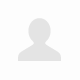
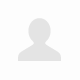

In [5]:
web_test.web_search("네이버", "크롤링")